In [1]:
import numpy as np

def softmax(a):
    y = np.exp(a) / np.sum(np.exp(a))
    return y

In [3]:
a = np.array([1,2,3,4])
print(sum(softmax(a)))


1.0


In [7]:
a = np.array([[1,2,3,4],
             [5,6,7,8]])
print(np.max(a))
print(a - np.max(a))

8
[[-7 -6 -5 -4]
 [-3 -2 -1  0]]


In [12]:
def softmax(a):
    # a: (b, n)
    if a.ndim == 2:
        # a.max(axis=1, keepdims=True): (b, 1)
        a = a - a.max(axis=1, keepdims=True)
        a = np.exp(a)
        # np.sum(a, axis=1, keepdims=True): (b, 1)
        y = a / np.sum(a, axis=1, keepdims=True)
    elif a.ndim == 1:
        # 이전 구현과 동일
        a = a - np.max(a)
        y = np.exp(a) / np.sum(np.exp(a))
    return y

a_1 = np.array([1,2,3,4])
a_2 = np.array([[1,2,3,4],
                [5,6,7,8],
                [9,10,11,13]])

print("ndim: 1")
print(softmax(a_1))

print("\nndim:2")
print(softmax(a_2))

ndim: 1
[0.0320586  0.08714432 0.23688282 0.64391426]

ndim:2
[[0.0320586  0.08714432 0.23688282 0.64391426]
 [0.0320586  0.08714432 0.23688282 0.64391426]
 [0.01521943 0.0413707  0.11245721 0.83095266]]


In [13]:
def softmax_2(a):
    # a: (b, n)
    if a.ndim == 2:
        a = a.T # (a.T): (n, b)
        a = a - a.max(axis=0) # a.max(axis=0): (b,)
        y = np.exp(a) / np.sum(np.exp(a), axis=0) # np.sum(np.exp(a), axis=0): (b,)
        return y.T # (n, b) -> (b, n)
    elif a.ndim == 1:
        # 이전 구현과 동일
        a = a - np.max(a)
        y = np.exp(a) / np.sum(np.exp(a))
    return y

a_1 = np.array([1,2,3,4])
a_2 = np.array([[1,2,3,4],
                [5,6,7,8],
                [9,10,11,13]])

print("ndim: 1")
print(softmax_2(a_1))

print("\nndim:2")
print(softmax_2(a_2))

ndim: 1
[0.0320586  0.08714432 0.23688282 0.64391426]

ndim:2
[[0.0320586  0.08714432 0.23688282 0.64391426]
 [0.0320586  0.08714432 0.23688282 0.64391426]
 [0.01521943 0.0413707  0.11245721 0.83095266]]


In [17]:
k = a_2.T - a_2.T.max(axis=0)
print(np.exp(k) / np.sum(np.exp(k), axis=0))

[[0.0320586  0.0320586  0.01521943]
 [0.08714432 0.08714432 0.0413707 ]
 [0.23688282 0.23688282 0.11245721]
 [0.64391426 0.64391426 0.83095266]]


In [18]:
class Softmax:
    def __init__(self):
        self.params, grads = [], []
        self.out = None
    
    def forward(self, a):
        out = softmax(a)
        self.out = out
        return self.out
    
    def backward(self, dout):
        # dout = (∂L/∂y)
        dx = self.out * dout
        sumdx = np.sum(dx, axis=1, keepdims=True)
        dx -= self.out * sumdx
        return dx

In [ ]:
def cross_entropy_error(y, t):
    if y.ndim == 1: # 1차원인 경우 배치 처리할 때와 동일하게 2차원으로 맞춰주기
        y = y.reshpae(1, y.size)
        t = t.reshape(1, t.size)
    
    if t.size == y.size: # 원 핫 벡터를 레이블 인덱스로 변환하기
        t = t.argmax(axis=1)
    
    batch_size = y.shape[0] # 샘플 개수로 나눠 평균 취하기
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [ ]:
class SoftmaxWithLoss:
    def __init__(self):
        self.params, grads = [], []
        self.y = None # 소프트맥스 출력값
        self.t = None # 정답 레이블 인덱스

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)

        if self.t.size == self.y.size: # 원핫 벡터인 경우 레이블 인덱스로 변환
            self.t = self.t.argmax(axis=1)
        
        loss = cross_entropy_error(self.y, self.t)
        return loss
    
    def backward(self, dout=1):
        batch_size = self.t.shape[0] # 샘플 개수 체크

        dx = self.y.copy() # 입력을 복사
        dx[np.arange(batch_size), self.t] -= 1 # 정답 인덱스에 접근하여 -1
        dx *= dout # 이전 계층 미분 계수 곱해주기
        dx = dx / batch_size # 샘플 개수로 나눠 평균 취하기

        return dx
        

In [21]:
y = np.array([[0.1, 0.2, 0.7],
              [0.2, 0.3, 0.5]])

batch_size = y.shape[0]
print(f"batch size: {batch_size}") # 2

t = np.array([[1, 0, 0],
              [0, 1, 0]])
t = t.argmax(axis=1)
print(f"t: {t}") # [0 1]

print(f"y[np.arange(batch_size), t]: {y[np.arange(batch_size), t]}") # [0.1 0.3]

batch size: 2
t: [0 1]
y[np.arange(batch_size), t]: [0.1 0.3]


In [3]:
import numpy as np
np.random.seed(1)

T, H = 5, 4
hs = np.random.randn(T, H)
a = np.array([0.8, 0.1, 0.03, 0.05, 0.02])

ar = a.reshape(5,1).repeat(4, axis=1) ## repeat를 사용하지 않아도 broadcasting이 일어날 것이지만 눈에 잘 띄지 않음. 역전파도 수행해야 함. repeat에 대한 역전파는 각 미분 계수의 누적합으로 계산됨
print(ar)
print(f"ar: {ar.shape}")
print()

t = hs * ar

c = np.sum(t, axis=0)
print(f"c: {c.shape}")

[[0.8  0.8  0.8  0.8 ]
 [0.1  0.1  0.1  0.1 ]
 [0.03 0.03 0.03 0.03]
 [0.05 0.05 0.05 0.05]
 [0.02 0.02 0.02 0.02]]
ar: (5, 4)

c: (4,)


In [4]:
import numpy as np
np.random.seed(1)

T, H = 5, 4
hs = np.random.randn(T, H)
a = np.array([0.8, 0.1, 0.03, 0.05, 0.02])

ar = a.reshape(5,1).repeat(4, axis=1) ## repeat를 사용하지 않아도 broadcasting이 일어날 것이지만 눈에 잘 띄지 않음. 역전파도 수행해야 함. repeat에 대한 역전파는 각 미분 계수의 누적합으로 계산됨
print(ar)
print(f"ar: {ar.shape}")
print()

t = np.matmul(hs, a)


c = np.sum(t, axis=0)
print(f"c: {c.shape}")

[[0.8  0.8  0.8  0.8 ]
 [0.1  0.1  0.1  0.1 ]
 [0.03 0.03 0.03 0.03]
 [0.05 0.05 0.05 0.05]
 [0.02 0.02 0.02 0.02]]
ar: (5, 4)

c: (4,)


## 24.01.16(화)

In [1]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    y = x1*w1 + x2*w2
    if y < theta:
        return 0
    else:
        return 1
    
print(AND(1,1))
print(AND(1,0))
print(AND(0,1))
print(AND(0,0))

1
0
0
0


In [3]:
def OR(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.5
    y = x1*w1 + x2*w2
    if y < theta:
        return 0
    else:
        return 1
    
print(OR(1,1))
print(OR(1,0))
print(OR(0,1))
print(OR(0,0))    

1
1
1
0


In [4]:
def NAND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.5
    y = x1*w1 + x2*w2
    if y > theta:
        return 0
    else:
        return 1
    
print(NAND(1,1))
print(NAND(1,0))
print(NAND(0,1))
print(NAND(0,0))    

0
1
1
1


In [5]:
def XOR(x1, x2):
    t1, t2 = NAND(x1, x2), OR(x1, x2)
    y = AND(t1, t2)
    return y

print(XOR(0,0))
print(XOR(0,1))
print(XOR(1,0))
print(XOR(1,1))

0
1
1
0


## 24.01.17(수)

In [6]:
import numpy as np

def step_function(x):
    if x > 0:
        return 1
    else:
        return 0
    
step_function(1)

1

In [7]:
def step_function(x):
    y = x > 0
    return y.astype(np.int32)

In [9]:
step_function(np.array([1,-1,-2]))

array([1, 0, 0], dtype=int32)

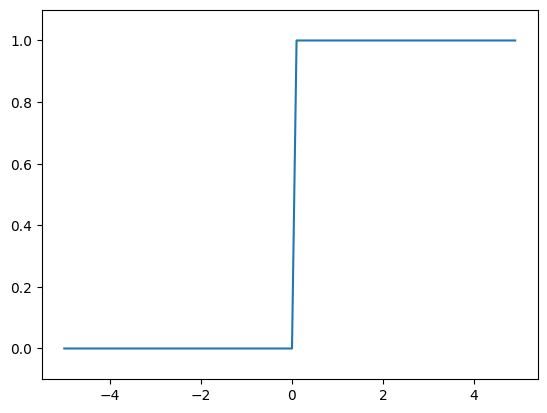

In [14]:
import matplotlib.pyplot as plt

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

## 24.01.18(목)

In [22]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

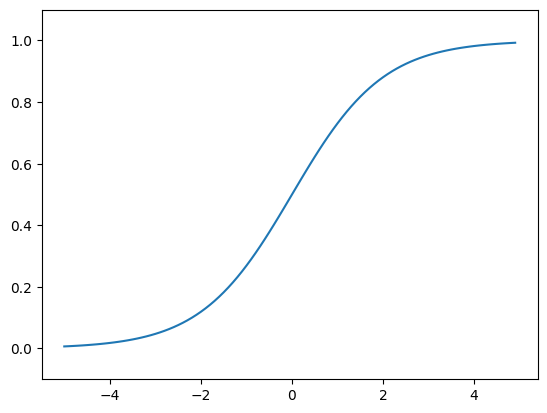

In [16]:
import matplotlib.pyplot as plt

x2 = np.arange(-5.0, 5.0, 0.1)
y2 = sigmoid(x)

plt.plot(x2,y2)
plt.ylim(-0.1, 1.1)
plt.show()

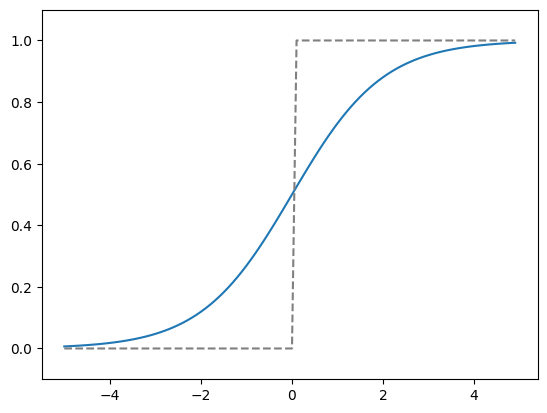

In [17]:
plt.plot(x2, y2)
plt.plot(x,y, color='grey', linestyle='--')
plt.ylim(-0.1, 1.1)
plt.show()

## 24.01.19(금)

In [18]:
def relu(x):
    return np.maximum(0, x)

In [19]:
def identity_function(x):
    return x

In [23]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


In [24]:
def softmax(x):
    exp_a = np.exp(x)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [25]:
def softmax(x):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [27]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


## 24.01.20(토)

In [29]:
def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [30]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [31]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        y = y.reshape(1, y.size)
        t = t.reshape(1, t.size)
    
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [32]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        y = y.reshape(1, y.size)
        t = t.reshape(1, t.size)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

## 24.01.21(일)

In [34]:
def numerical_diff(f, x):
    h = 1e-50
    return (f(x+h) - f(x)) / h

In [36]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [37]:
def function_1(x):
    return 0.01 * x ** 2 + 0.1 * x

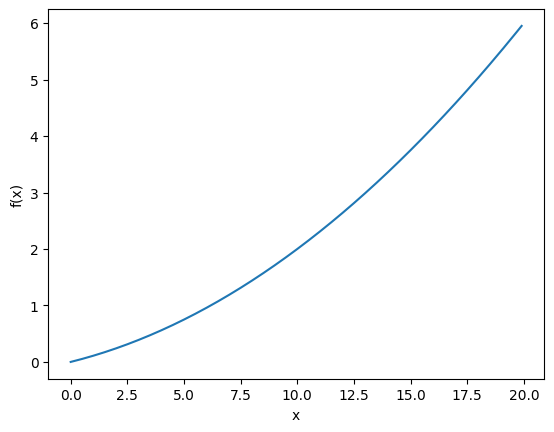

In [39]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,y)
plt.show()

In [56]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val

    return grad

In [58]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [59]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


## 24.01.22(월)

In [54]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x

In [64]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x, 0.1)

array([-6.11110793e-10,  8.14814391e-10])

In [66]:
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x, 10.0))

init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x, 1e-10))

[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


In [72]:
from book1.common.functions import softmax, cross_entropy_error
from book1.common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)

    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [73]:
net = simpleNet()
print(net.W)

[[-0.8294322  -0.13283431 -0.35597393]
 [-1.35941623  1.72560019 -1.1087015 ]]


In [77]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

t = np.array([0, 0, 1])
print(net.loss(x, t))

[-1.72107393  1.47333959 -1.2114157 ]
2.7884183492026153


In [78]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.02217243  0.54091565 -0.56308808]
 [ 0.03325865  0.81137347 -0.84463212]]


## 24.01.23(화)

In [1]:
from book1.common.functions import *
from book1.common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y
    
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argamx(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y==t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads


In [4]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [5]:
x = np.random.rand(100, 784)
y = net.predict(x)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t)

print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


## 24.01.24(수)

In [ ]:
import numpy as np
from book1.dataset.mnist import load_mnist
from tqdm.auto import tqdm

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in tqdm(range(iters_num)):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad= network.numerical_gradient(x_batch, t_batch)

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

## 24.02.06(화)

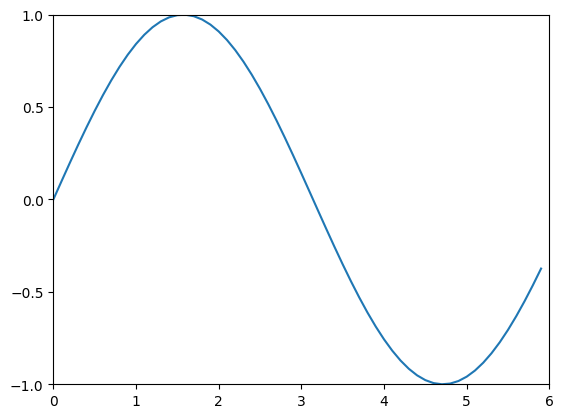

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 6, 0.1)
y = np.sin(x)

plt.plot(x, y)
plt.xticks(np.arange(0,7,1))
plt.xlim(0,6)
plt.yticks(np.arange(-1.0,1.5,0.5))
plt.ylim(-1.0, 1.0)
plt.show()

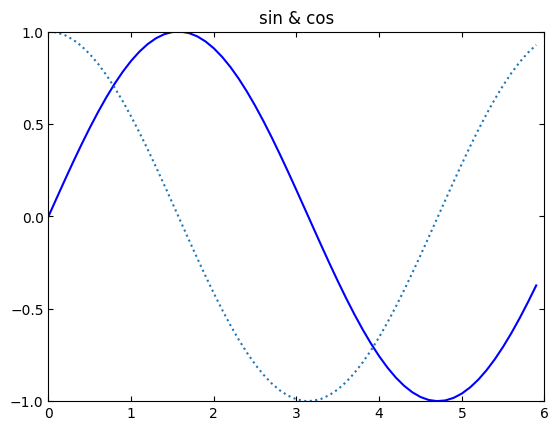

In [22]:
x = np.arange(0, 6, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y1, color='blue')
plt.plot(x, y2, ':')
plt.tick_params(top=True, right=True, direction='in')
plt.xlim(0,6)
plt.yticks(np.arange(-1.0,1.5,0.5))
plt.ylim(-1.0, 1.0)
plt.title('sin & cos')
plt.show()

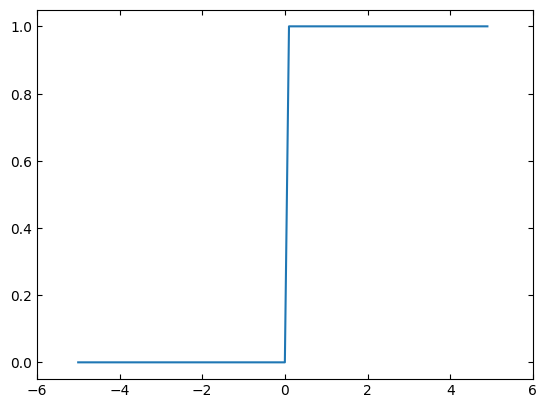

In [25]:
x = np.arange(-5, 5, 0.1)
y = np.int32(x > 0)

plt.plot(x, y)
plt.xticks(np.arange(-6, 8, 2))
plt.tick_params(top=True, right=True, direction='in')
plt.show()

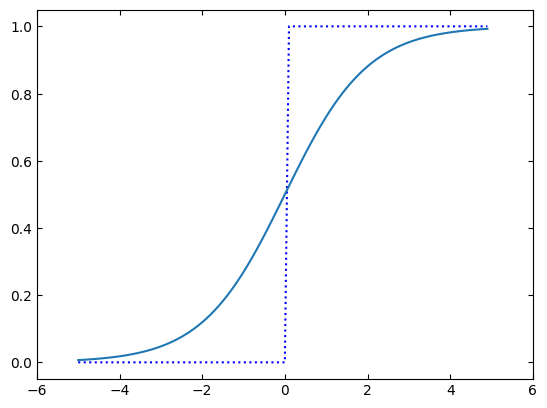

In [26]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5, 5, 0.1)
y1 = np.int32(x > 0)
y2 = sigmoid(x)

plt.plot(x, y1, ':', color='blue')
plt.plot(x, y2)
plt.xticks(np.arange(-6, 8, 2))
plt.tick_params(top=True, right=True, direction='in')
plt.show()

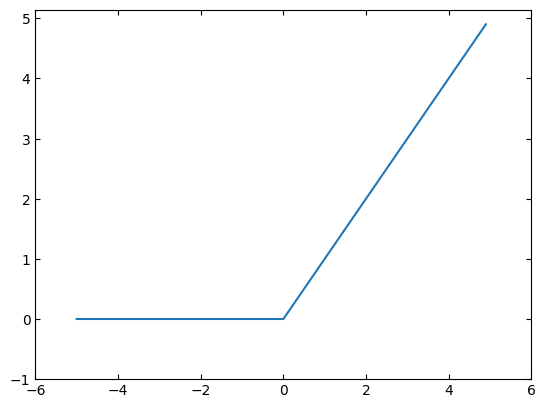

In [28]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5, 5, 0.1)
y = relu(x)

plt.plot(x, y)
plt.xticks(np.arange(-6, 8, 2))
plt.yticks(np.arange(-1, 6, 1))
plt.tick_params(top=True, right=True, direction='in')
plt.show()

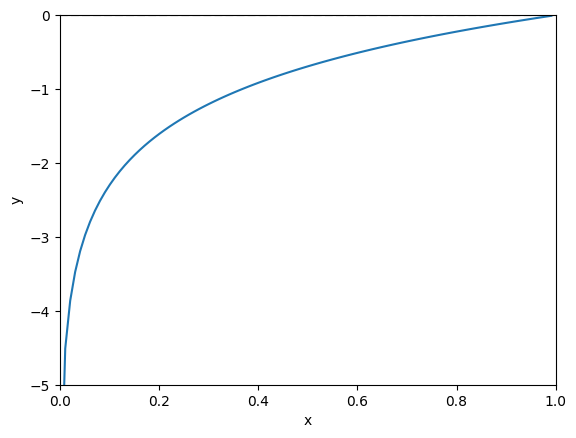

In [50]:
x = np.arange(0.001, 1.0, 0.01)  # Start from 0.001 instead of 0 to avoid division by zero
y = np.log(x)

plt.plot(x, y)
plt.xlim(0, 1.0)  # Set the x-axis limits
plt.ylim(-5, 0)
plt.xticks(np.arange(0.0, 1.1, 0.2))
plt.yticks(np.arange(-5, 1, 1))
plt.axhline(0, color='black', linestyle='--')  # Add a horizontal line at y=0
plt.xlabel('x')
plt.ylabel('y')
plt.show()

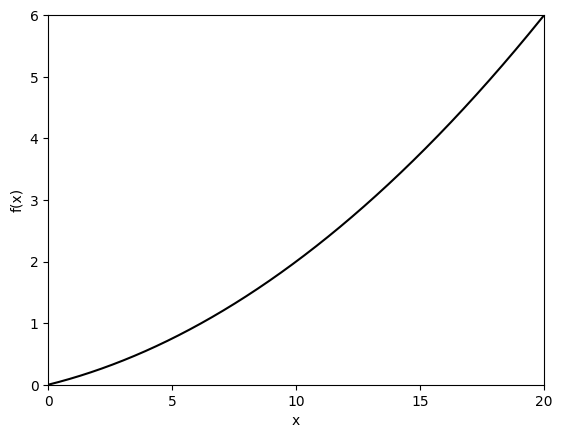

In [57]:
x = np.arange(0, 20, 0.01)
y = 0.01 * x ** 2 + 0.1 * x

plt.plot(x, y, color='black')
# plt.axhline(0, color='black', linestyle='--')  # Add a horizontal line at y=0
plt.xlim(0,20)
plt.ylim(0,6)
plt.xticks(np.arange(0,25,5))
plt.yticks(np.arange(0,7,1))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()